# Antarctic and Greenland bathymetry: bedrock and ice surface

![Greenland and Antarctica bedrock bathymetry](images/Greenland_Antarctica_bedrock_bathymetry.png)

The ETOPO Global Relief Model integrates topography, bathymetry, and shoreline data from regional and global datasets to enable comprehensive, high-resolution renderings of the Earth's geophysical characteristics. It supports applications such as:
- Tsunami forecasting, modeling, and warning.
- Ocean circulation modeling.
- Earth surface visualisation.

## Data characteristics
- **Spatial resolution**: 15 arc-second latitude x 15 arc-second longitude 
- **Includes**: Berock elevation, ice surface elevation and geoid height. 
- **Granularity**: The data are divided into **15° latitude × 15° longitude** tiles. There is also one file each for bedrock elevation, ice surface elevation and geoid height. This allows data users to more easily focus on specific areas of interest.

## Useful Links

- **Dataset Landing Page**  
   https://www.ncei.noaa.gov/products/etopo-global-relief-model

- **THREDDS Catalogue**
  - Human interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/catalog.html
  - Machine interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/catalog.xml

## Crediting the Data Providers

When using this dataset in publications or presentations, please provide the following citation:  

> **NOAA National Centers for Environmental Information.** 2022: ETOPO 2022 15 Arc-Second Global Relief Model. NOAA National Centers for Environmental Information. DOI: 10.25921/fd45-gt74. Accessed [date].


## Exploring the data in Python

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('') # video id

### Importing modules

In [2]:
import xarray as xr # For reading data from a NetCDF file
import matplotlib.pyplot as plt # For plotting the data
import cartopy.crs as ccrs # For plotting maps
import numpy as np # For working with arrays of data
import cmocean # Colour maps for oceanography
from siphon.catalog import TDSCatalog # For looping through the THREDDs catalogue

### Opening and understanding the data

The data have been published in a CF-NetCDF files. Whilst it is possible to directly download these data, we are not going to do that. The data are served over a THREDDs catalogue:

**Bedrock bathymetry**
- Human interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_bed_elev_netcdf/catalog.html
- Machine interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_bed_elev_netcdf/catalog.xml
 
**Ice surface bathymetry**
- Human interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.html
- Machine interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_surface_elev_netcdf/catalog.xml

**Geoid height**
- Human interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_geoid_netcdf/catalog.html
- Machine interface: https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_geoid_netcdf/catalog.xml

If you click on the human-interface above and select one of the files, you will see that the data are served over OPeNDAP. OPeNDAP provides a way of streaming data over the internet so you don't have to download them to your own computer. You can copy the OPeNDAP Data URL and use it in your script in the same way that you would use a local filepath.
  
#### One tile

Let's start by opening just a single file.

In [3]:
url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_bed_elev_netcdf/ETOPO_2022_v1_15s_N90W015_bed.nc'
ds = xr.open_dataset(url)
ds

<xarray.Dataset> Size: 52MB
Dimensions:  (lat: 3600, lon: 3600)
Coordinates:
  * lat      (lat) float64 29kB 75.0 75.01 75.01 75.01 ... 89.99 89.99 90.0
  * lon      (lon) float64 29kB -15.0 -14.99 -14.99 ... -0.00625 -0.002083
Data variables:
    crs      |S64 64B ...
    z        (lat, lon) float32 52MB ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929080932.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    DODS.strlen:                    0

The data 2 dimensions, lat and lon, and a data variable z which includes the bathymetry data. Each variable has metadata associated it, and the dataset as a whole has 9 global attributes. The data are compliant with version 1.5 of the Climate & Forecast conventions: 

https://cfconventions.org/

However, the dataset lacks extensive discovery metadata, which are useful for finding and understanding the data (e.g. keywords, collection time, data providers). To improve data discovery, it would be beneficial for the data providers to include more global attributes from the Attribute Convention for Data Discovery:

https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3

#### Looping through all the tiles

We will use Python to loop through the THREDDs catalogue and read in each of the CF-NetCDF files one by one. 

Let's first provide the machine-interface to the catalogue. This is in XML format. You can paste this into your web browser to view it yourself. 

In [4]:
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_bed_elev_netcdf/catalog.xml'

Within this XML file you can see the relative `urlPath` for each file. `TDSCatalog` is able to derive the OPeNDAP data access URL from the `catalog_url` above and this `urlPath`.

Let's open up a couple of the files, places restrictions on which files to open using an `if` statement.

In [5]:
catalog = TDSCatalog(catalog_url)
for dataset in catalog.datasets.values():
    if 'ETOPO_2022_v1_15s_N60' in dataset.name: # Only data from the northern hemisphere, loading 3 tiles from N60. 
        opendap_url = dataset.access_urls['OPENDAP']
        ds = xr.open_dataset(opendap_url)
        print('File:',dataset.name)
        print(ds,'\n')

File: ETOPO_2022_v1_15s_N60W030_bed.nc
<xarray.Dataset> Size: 52MB
Dimensions:  (lat: 3600, lon: 3600)
Coordinates:
  * lat      (lat) float64 29kB 45.0 45.01 45.01 45.01 ... 59.99 59.99 60.0
  * lon      (lon) float64 29kB -30.0 -29.99 -29.99 ... -15.01 -15.01 -15.0
Data variables:
    crs      |S64 64B ...
    z        (lat, lon) float32 52MB ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929080927.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    DODS.strlen:                    0 

File: ETOPO_2022_v1_15s_N60W045_bed.nc
<xarray.Dataset> Size: 52MB
Dimensions:  (lat: 3600, lon: 3600)
Coordinates:
  * lat      

### Plotting bedrock bathymetry for one tile

`xarray` has inbuilt functionality to plot data. So we can quickly plot the data like this:

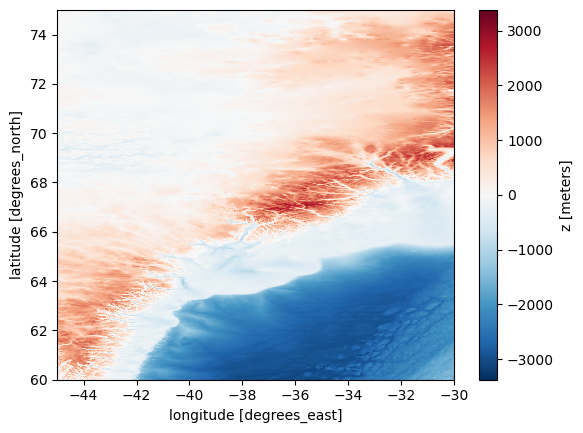

In [6]:
url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_bed_elev_netcdf/ETOPO_2022_v1_15s_N75W045_bed.nc'
ds = xr.open_dataset(url)
bathymetry = ds['z']
bathymetry.plot()
plt.show()

The data are of high resolution, which can make plotting time-consuming. To speed up the process, we can resample the data by selecting every 10th point in both latitude and longitude.

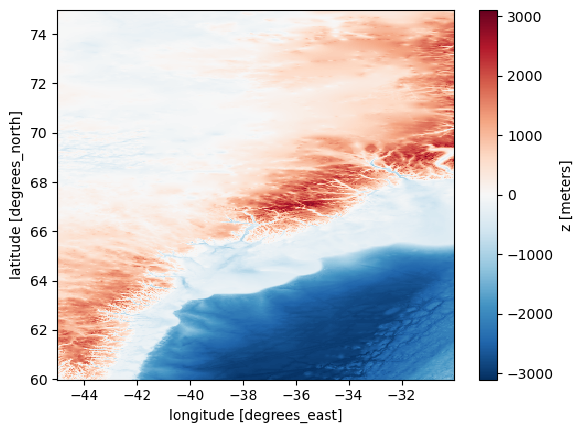

In [7]:
url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_bed_elev_netcdf/ETOPO_2022_v1_15s_N75W045_bed.nc'
ds = xr.open_dataset(url)

# Resample the data
sampling_factor = 10
ds_resampled = ds.isel(
    lat=slice(None, None, sampling_factor), # start, end and interval
    lon=slice(None, None, sampling_factor)
)

bathymetry = ds_resampled['z']

bathymetry.plot()
plt.show()

Let's try adding a map projection. We can select one from https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

To do this, we first plot the figure and axis with the projection, and then plot the data onto that axis.

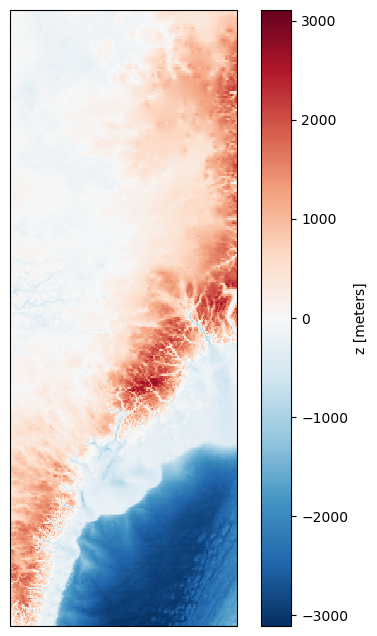

In [8]:
url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_bed_elev_netcdf/ETOPO_2022_v1_15s_N75W045_bed.nc'
ds = xr.open_dataset(url)

# Resample the data
sampling_factor = 10
ds_resampled = ds.isel(
    lat=slice(None, None, sampling_factor), # start, end and interval
    lon=slice(None, None, sampling_factor)
)

projection = ccrs.Mercator() # Map projection for visualisation https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(6, 8))

bathymetry = ds_resampled['z']
transform = ccrs.PlateCarree()
im = bathymetry.plot(ax=ax, transform=transform)

plt.show()

Let's select a different colour palette. The library `cmocean` includes a lot of different colour palettes for oceanography.

https://matplotlib.org/cmocean/

We can use `vmin` and `vmax` to provide a range for the colour palette.

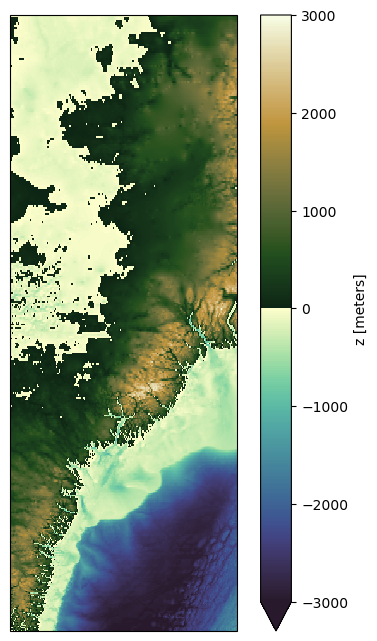

In [9]:
url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_bed_elev_netcdf/ETOPO_2022_v1_15s_N75W045_bed.nc'
ds = xr.open_dataset(url)

# Resample the data
sampling_factor = 10
ds_resampled = ds.isel(
    lat=slice(None, None, sampling_factor), # start, end and interval
    lon=slice(None, None, sampling_factor)
)

projection = ccrs.Mercator() # Map projection for visualisation https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(6, 8))

bathymetry = ds_resampled['z']

cmap = cmocean.cm.topo
vmin = -3000
vmax = 3000
transform = ccrs.PlateCarree()
im = bathymetry.plot(cmap=cmap, ax=ax, transform=transform, vmin=vmin, vmax=vmax,)

plt.show()

Now let's make some final additions to the plot.

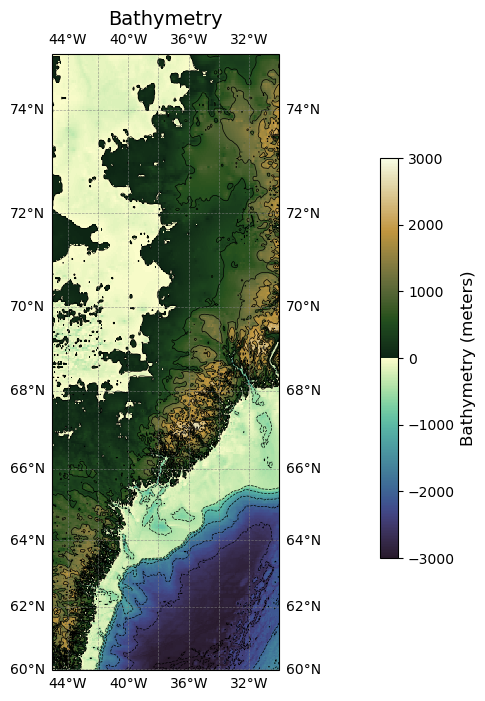

In [10]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker

url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_bed_elev_netcdf/ETOPO_2022_v1_15s_N75W045_bed.nc'
ds = xr.open_dataset(url)

# Resample the data
sampling_factor = 10
ds_resampled = ds.isel(
    lat=slice(None, None, sampling_factor), # start, end and interval
    lon=slice(None, None, sampling_factor)
)

projection = ccrs.Mercator() # Map projection for visualisation https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(6, 8))

bathymetry = ds_resampled['z']

cmap = cmocean.cm.topo
vmin = -3000
vmax = 3000
transform = ccrs.PlateCarree()
im = bathymetry.plot(cmap=cmap, ax=ax, transform=transform, vmin=vmin, vmax=vmax, add_colorbar=False) # Prevent colour bar from plotting twice

# Define contour levels
contour_interval = 500
contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)
# Plot contours
bathymetry.plot.contour(levels=contour_levels, ax=ax, transform=transform, 
                                colors='black', linewidths=0.5)

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add title and colour bar
ax.set_title('Bathymetry', fontsize=14)
    
# Add colour bar
cbar_ax = fig.add_axes([0.87, 0.25, 0.03, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Bathymetry (meters)', fontsize=12)

plt.show()

#### Full working example

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker

def plot_bathymetry(url, cmap, vmin, vmax, projection=ccrs.Mercator(), sampling_factor=10, 
                    contour_interval=500, title='Bathymetry', 
                    colorbar_label='Bathymetry (meters)', figsize=(6, 8)):
    """
    Parameters:
    url (str): URL or path to the NetCDF file.
    cmap: Matplotlib or cmocean colormap for the plot.
    vmin, vmax (int/float): Minimum and maximum elevation for the colour scale.
    projection: Cartopy projection for the map.
    sampling_factor (int): Factor to downsample the data for faster plotting.
    contour_interval (int): Interval for contour lines.
    title (str): Title of the plot.
    colorbar_label (str): Label for the colour bar.
    figsize (tuple): Size of the figure.
    """
    # Load the dataset
    ds = xr.open_dataset(url)

    # Resample the data
    sampling_factor = 10
    ds_resampled = ds.isel(
        lat=slice(None, None, sampling_factor), # start, end and interval
        lon=slice(None, None, sampling_factor)
    )

    bathymetry = ds_resampled['z']

    transform = ccrs.PlateCarree()

    # Create a figure and axis
    fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=figsize)

    # Define contour levels
    contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)

    # Plot the data
    im = bathymetry.plot(cmap=cmap, ax=ax, transform=transform, vmin=vmin, vmax=vmax, add_colorbar=False)

    # Plot contours
    bathymetry.plot.contour(levels=contour_levels, ax=ax, transform=transform, 
                                      colors='black', linewidths=0.5)

    # Configure gridlines
    gl = ax.gridlines(
        crs=transform, draw_labels=True, linewidth=0.5,
        color='gray', alpha=0.7, linestyle='--'
    )
    gl.ylocator = mticker.AutoLocator()
    gl.xlocator = mticker.AutoLocator()
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

    # Add title and colour bar
    ax.set_title(title, fontsize=14)
    
    # Add colour bar
    cbar_ax = fig.add_axes([0.87, 0.25, 0.03, 0.5])  # [left, bottom, width, height]
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label(colorbar_label, fontsize=12)

    plt.show()

Now let's execute that function.

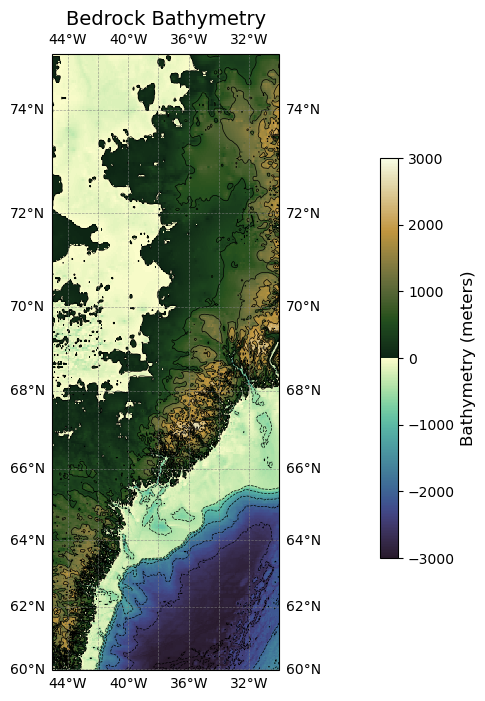

In [12]:
plot_bathymetry(
    url='https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_bed_elev_netcdf/ETOPO_2022_v1_15s_N75W045_bed.nc',
    cmap=cmocean.cm.topo,
    vmin=-3000,
    vmax=3000,
    title='Bedrock Bathymetry'
)

### Plotting ice surface elevation for one tile

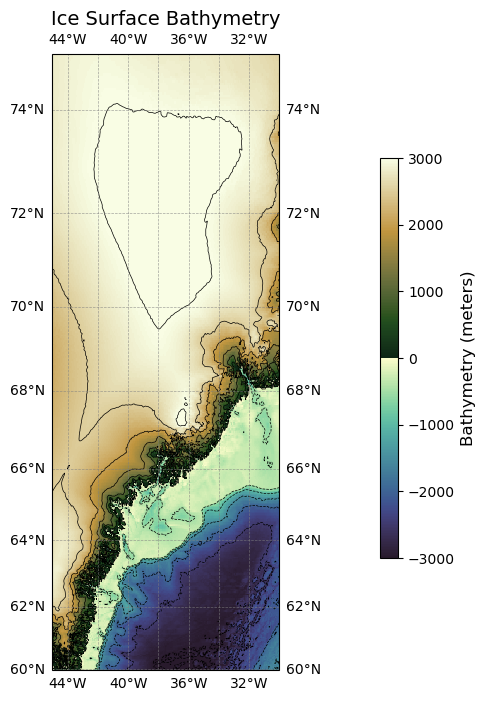

In [13]:
plot_bathymetry(
    url='https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N75W045_surface.nc',
    cmap=cmocean.cm.topo,
    vmin=-3000,
    vmax=3000,
    title='Ice Surface Bathymetry'
)

### Plotting geoid height for one tile

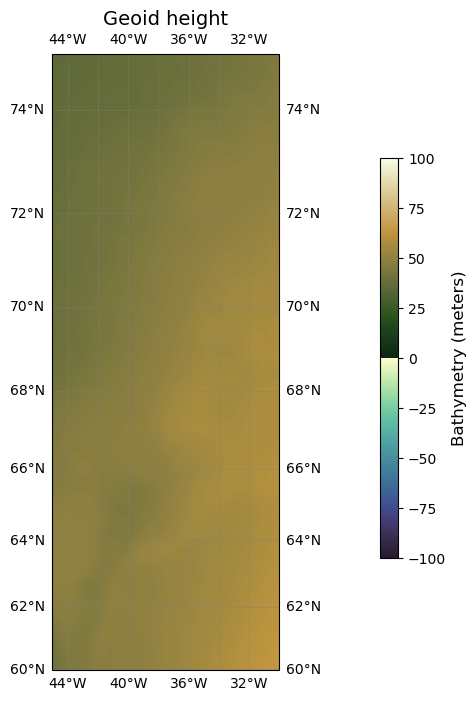

In [14]:
plot_bathymetry(
    url='https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_geoid_netcdf/ETOPO_2022_v1_15s_N75W045_geoid.nc',
    cmap=cmocean.cm.topo,
    vmin=-100,
    vmax=100,
    title='Geoid height'
)

### Computing the ice thickness

In [15]:
sampling_factor = 10

bedrock_bathymetry_url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_bed_elev_netcdf/ETOPO_2022_v1_15s_N75W045_bed.nc'
bedrock_bathymetry_ds = xr.open_dataset(bedrock_bathymetry_url)

# Resample the data
bedrock_bathymetry_ds_resampled = bedrock_bathymetry_ds.isel(
    lat=slice(None, None, sampling_factor), # start, end and interval
    lon=slice(None, None, sampling_factor)
)

ice_surface_bathymetry_url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_surface_elev_netcdf/ETOPO_2022_v1_15s_N75W045_surface.nc'
ice_surface_bathymetry_ds = xr.open_dataset(ice_surface_bathymetry_url)

# Resample the data
ice_surface_bathymetry_ds_resampled = ice_surface_bathymetry_ds.isel(
    lat=slice(None, None, sampling_factor), # start, end and interval
    lon=slice(None, None, sampling_factor)
)

# Computing the ice thickness
bedrock_bathymetry = bedrock_bathymetry_ds_resampled['z']
ice_surface_bathymetry = ice_surface_bathymetry_ds_resampled['z']

ice_thickness = ice_surface_bathymetry - bedrock_bathymetry
ice_thickness

<xarray.DataArray 'z' (lat: 360, lon: 360)> Size: 518kB
array([[ 9.9922180e-02,  8.3898926e-01, -1.7539978e-01, ...,
         3.4909668e+00,  1.1684570e+00,  1.5560547e+01],
       [ 2.2317200e+00,  2.8958511e-01,  6.4606094e+00, ...,
         1.0388184e+00, -4.2647095e+01, -1.2547363e+01],
       [ 2.0805550e+00,  1.9022884e+00,  4.6504974e-01, ...,
        -7.9223633e+00, -2.4365234e-01,  8.6613770e+00],
       ...,
       [ 2.7466025e+03,  2.7564221e+03,  2.7592844e+03, ...,
         1.9250111e+03,  1.9044199e+03,  1.8757640e+03],
       [ 2.7624097e+03,  2.7782856e+03,  2.7909805e+03, ...,
         2.0261189e+03,  2.0201501e+03,  2.0176443e+03],
       [ 2.8904727e+03,  2.8913271e+03,  2.8670420e+03, ...,
         2.0913994e+03,  2.0910613e+03,  2.0849414e+03]], dtype=float32)
Coordinates:
  * lat      (lat) float64 3kB 60.0 60.04 60.09 60.13 ... 74.88 74.92 74.96
  * lon      (lon) float64 3kB -45.0 -44.96 -44.91 ... -30.12 -30.08 -30.04

Now let's plot the ice thickness data on a map.

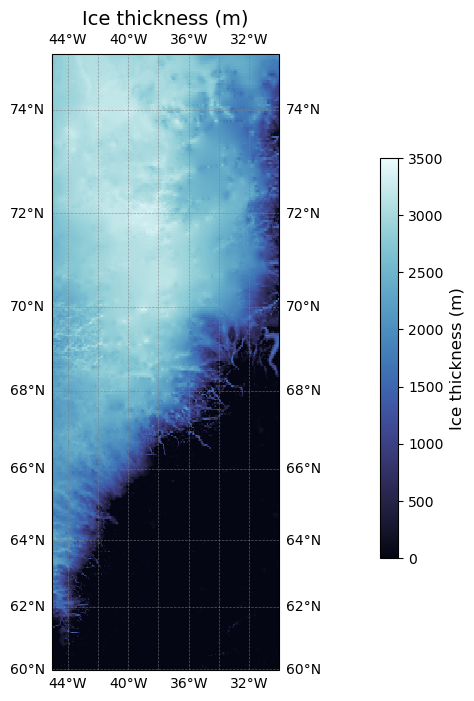

In [16]:
projection = ccrs.Mercator() # Map projection for visualisation https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(6, 8))

transform = ccrs.PlateCarree()
im = ice_thickness.plot(cmap=cmocean.cm.ice, ax=ax, transform=transform, vmin=0, vmax=3500, add_colorbar = False)

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add colour bar
cbar_ax = fig.add_axes([0.87, 0.25, 0.03, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Ice thickness (m)', fontsize=12)

# Add title and colour bar
ax.set_title('Ice thickness (m)', fontsize=14)

plt.show()


### Combining data from multiple tiles

#### Into a single xarray object

In [17]:
import xarray as xr
from siphon.catalog import TDSCatalog

# Access the catalog
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_bed_elev_netcdf/catalog.xml'
catalog = TDSCatalog(catalog_url)

# Initialise an empty list to store the datasets
datasets = []

# Loop through the datasets and load the ones matching the criteria
for dataset in catalog.datasets.values():
    if 'ETOPO_2022_v1_15s_N60' in dataset.name:
        opendap_url = dataset.access_urls['OPENDAP']
        ds = xr.open_dataset(opendap_url)
        # Resample the data
        sampling_factor = 10
        ds_resampled = ds.isel(
            lat=slice(None, None, sampling_factor), # start, end and interval
            lon=slice(None, None, sampling_factor)
        )
        datasets.append(ds_resampled)

# Combine the datasets along the longitude dimension
combined_ds = xr.concat(datasets, dim='lon')
combined_ds

<xarray.Dataset> Size: 2MB
Dimensions:  (lon: 1080, lat: 360)
Coordinates:
  * lat      (lat) float64 3kB 45.0 45.04 45.09 45.13 ... 59.88 59.92 59.96
  * lon      (lon) float64 9kB -30.0 -29.96 -29.91 ... -45.12 -45.08 -45.04
Data variables:
    crs      (lon) |S64 69kB b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    z        (lat, lon) float32 2MB -2.946e+03 -2.788e+03 ... 5.811 4.683
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929080927.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    DODS.strlen:                    0

If we want to plot these data, we need to ensure that the data are first sorted as they should be.

In [18]:
combined_ds_sorted = combined_ds.sortby(['lat', 'lon'])

And then plotting the data...

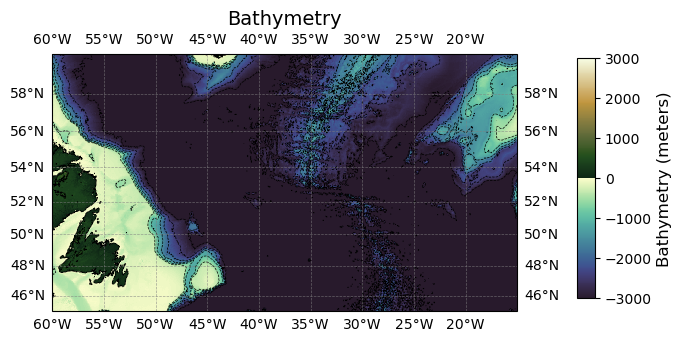

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker

projection = ccrs.Mercator()
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(6, 8))

bathymetry = combined_ds_sorted['z']

cmap = cmocean.cm.topo
vmin = -3000
vmax = 3000
transform = ccrs.PlateCarree()
im = bathymetry.plot(cmap=cmap, ax=ax, transform=transform, vmin=vmin, vmax=vmax, add_colorbar=False) # Prevent colour bar from plotting twice

# Define contour levels
contour_interval = 500
contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)
# Plot contours
bathymetry.plot.contour(levels=contour_levels, ax=ax, transform=transform, 
                                colors='black', linewidths=0.5)

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Add title and colour bar
ax.set_title('Bathymetry', fontsize=14)
    
# Add colour bar
cbar_ax = fig.add_axes([1.00, 0.35, 0.03, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Bathymetry (meters)', fontsize=12)

plt.show()

### Plotting the data for all of Greenland

#### Full working example

Processing dataset 1: ETOPO_2022_v1_15s_N60W030_bed.nc
Processing dataset 2: ETOPO_2022_v1_15s_N60W045_bed.nc
Processing dataset 3: ETOPO_2022_v1_15s_N60W060_bed.nc
Processing dataset 4: ETOPO_2022_v1_15s_N75W015_bed.nc
Processing dataset 5: ETOPO_2022_v1_15s_N75W030_bed.nc
Processing dataset 6: ETOPO_2022_v1_15s_N75W045_bed.nc
Processing dataset 7: ETOPO_2022_v1_15s_N75W060_bed.nc
Processing dataset 8: ETOPO_2022_v1_15s_N75W075_bed.nc
Processing dataset 9: ETOPO_2022_v1_15s_N90E000_bed.nc
No data in the specified range for this file.
Processing dataset 10: ETOPO_2022_v1_15s_N90W015_bed.nc
Processing dataset 11: ETOPO_2022_v1_15s_N90W030_bed.nc
Processing dataset 12: ETOPO_2022_v1_15s_N90W045_bed.nc
Processing dataset 13: ETOPO_2022_v1_15s_N90W060_bed.nc
Processing dataset 14: ETOPO_2022_v1_15s_N90W075_bed.nc
Processing dataset 15: ETOPO_2022_v1_15s_N90W090_bed.nc
Processing dataset 16: ETOPO_2022_v1_15s_N90W105_bed.nc
No data in the specified range for this file.


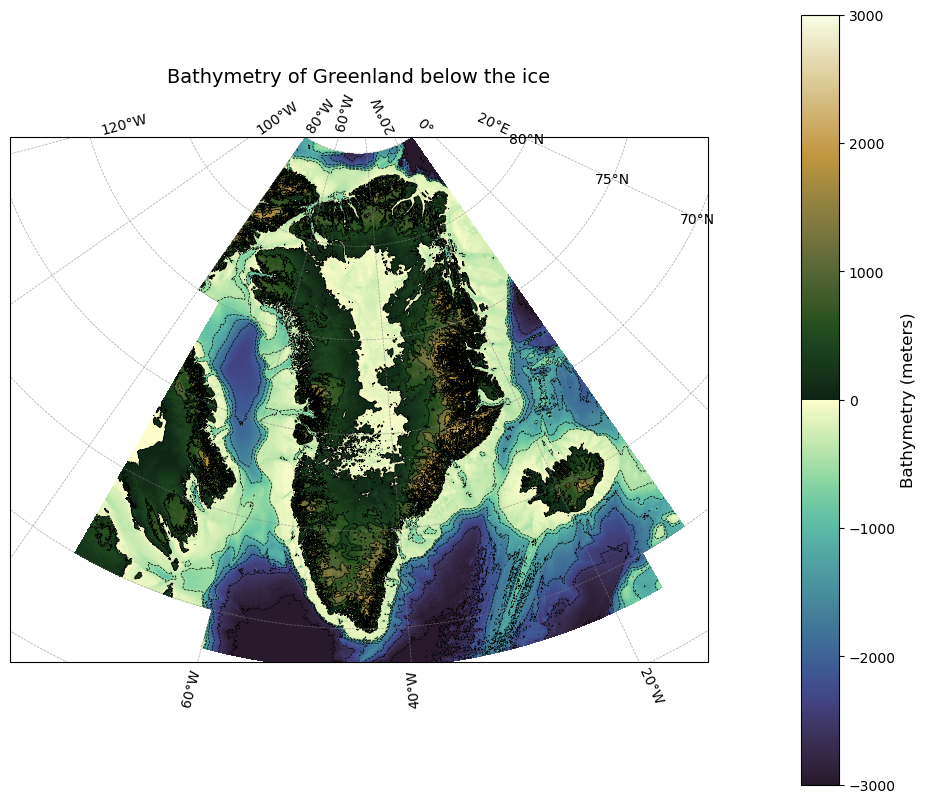

In [20]:
#!/usr/bin/env python3
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs
from siphon.catalog import TDSCatalog
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker

# Set up the map projection
projection = ccrs.NorthPolarStereo(central_longitude=-45)
transform = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(12, 10))

# Geospatial range to plot
# Set to 'False' to plot full range of the data, or provide a value
zoom = True
if zoom is True:
    lat_min = 58
    lat_max = 85
    lon_min = -80
    lon_max = -10
else:
    lat_min = None
    lat_max = None
    lon_min = None
    lon_max = None

# Initialising values
computed_lat_min = float('inf')
computed_lat_max = float('-inf')
computed_lon_min = float('inf')
computed_lon_max = float('-inf')

# Elevation range for colour scale
vmax = 3000
vmin = vmax * -1
# Contour interval
contour_interval = 500
contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)
# Plot only every nth sample in both lat and lon to speed up processing
sampling_factor = 10

# Traversing the THREDDS server
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_bed_elev_netcdf/catalog.xml'

# Access the THREDDS catalog
catalog = TDSCatalog(catalog_url)

n = 0
for dataset in catalog.datasets.values():
    if 'ETOPO_2022_v1_15s_N' in dataset.name:
        n += 1
        print(f"Processing dataset {n}: {dataset.name}")
        ds = xr.open_dataset(dataset.access_urls['OPENDAP'])
        bathymetry = ds['z']
        bathymetry_resampled = bathymetry.isel(
            lat=slice(None, None, sampling_factor),
            lon=slice(None, None, sampling_factor)
        )

        if zoom == True:
            # Selecting data only within geospatial limits specified
            bathymetry_resampled = bathymetry_resampled.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
            if bathymetry_resampled.size == 0:
                print("No data in the specified range for this file.")
                continue  # Skip this file and move to the next one

        # Update the global lat_min, lat_max, lon_min, lon_max across all files
        if zoom is False:
            computed_lat_min = min(computed_lat_min, bathymetry_resampled.coords['lat'].min().values)
            computed_lat_max = max(computed_lat_max, bathymetry_resampled.coords['lat'].max().values)
            computed_lon_min = min(computed_lon_min, bathymetry_resampled.coords['lon'].min().values)
            computed_lon_max = max(computed_lon_max, bathymetry_resampled.coords['lon'].max().values)

        # Plot the data
        im = bathymetry_resampled.plot(
            cmap=cmocean.cm.topo, vmin=vmin, vmax=vmax,
            ax=ax, transform=transform, add_colorbar=False
        )
        # Plot contours
        bathymetry_resampled.plot.contour(
            ax=ax, levels=contour_levels, colors='black',
            linewidths=0.5, transform=transform
        )

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Clip the map to the data extent
if zoom is False:
    lat_min = computed_lat_min
    lat_max = computed_lat_max
    lon_min = computed_lon_min
    lon_max = computed_lon_max
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=transform)

# Add title and colorbar
ax.set_title('Bathymetry of Greenland below the ice', fontsize=14)
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Bathymetry (meters)', fontsize=12)

# Save the plot
plt.savefig('greenland.png', dpi=500)

# Show the plot
plt.show()

### Plotting the data for all of Antarctica

#### Full working example

Processing dataset 1: ETOPO_2022_v1_15s_S60E000_bed.nc
Processing dataset 2: ETOPO_2022_v1_15s_S60E015_bed.nc
Processing dataset 3: ETOPO_2022_v1_15s_S60E030_bed.nc
Processing dataset 4: ETOPO_2022_v1_15s_S60E045_bed.nc
Processing dataset 5: ETOPO_2022_v1_15s_S60E060_bed.nc
Processing dataset 6: ETOPO_2022_v1_15s_S60E075_bed.nc
Processing dataset 7: ETOPO_2022_v1_15s_S60E090_bed.nc
Processing dataset 8: ETOPO_2022_v1_15s_S60E105_bed.nc
Processing dataset 9: ETOPO_2022_v1_15s_S60E120_bed.nc
Processing dataset 10: ETOPO_2022_v1_15s_S60E135_bed.nc
Processing dataset 11: ETOPO_2022_v1_15s_S60E150_bed.nc
Processing dataset 12: ETOPO_2022_v1_15s_S60E165_bed.nc
Processing dataset 13: ETOPO_2022_v1_15s_S60W015_bed.nc
Processing dataset 14: ETOPO_2022_v1_15s_S60W030_bed.nc
Processing dataset 15: ETOPO_2022_v1_15s_S60W045_bed.nc
Processing dataset 16: ETOPO_2022_v1_15s_S60W060_bed.nc
Processing dataset 17: ETOPO_2022_v1_15s_S60W075_bed.nc
Processing dataset 18: ETOPO_2022_v1_15s_S60W090_bed.nc
P

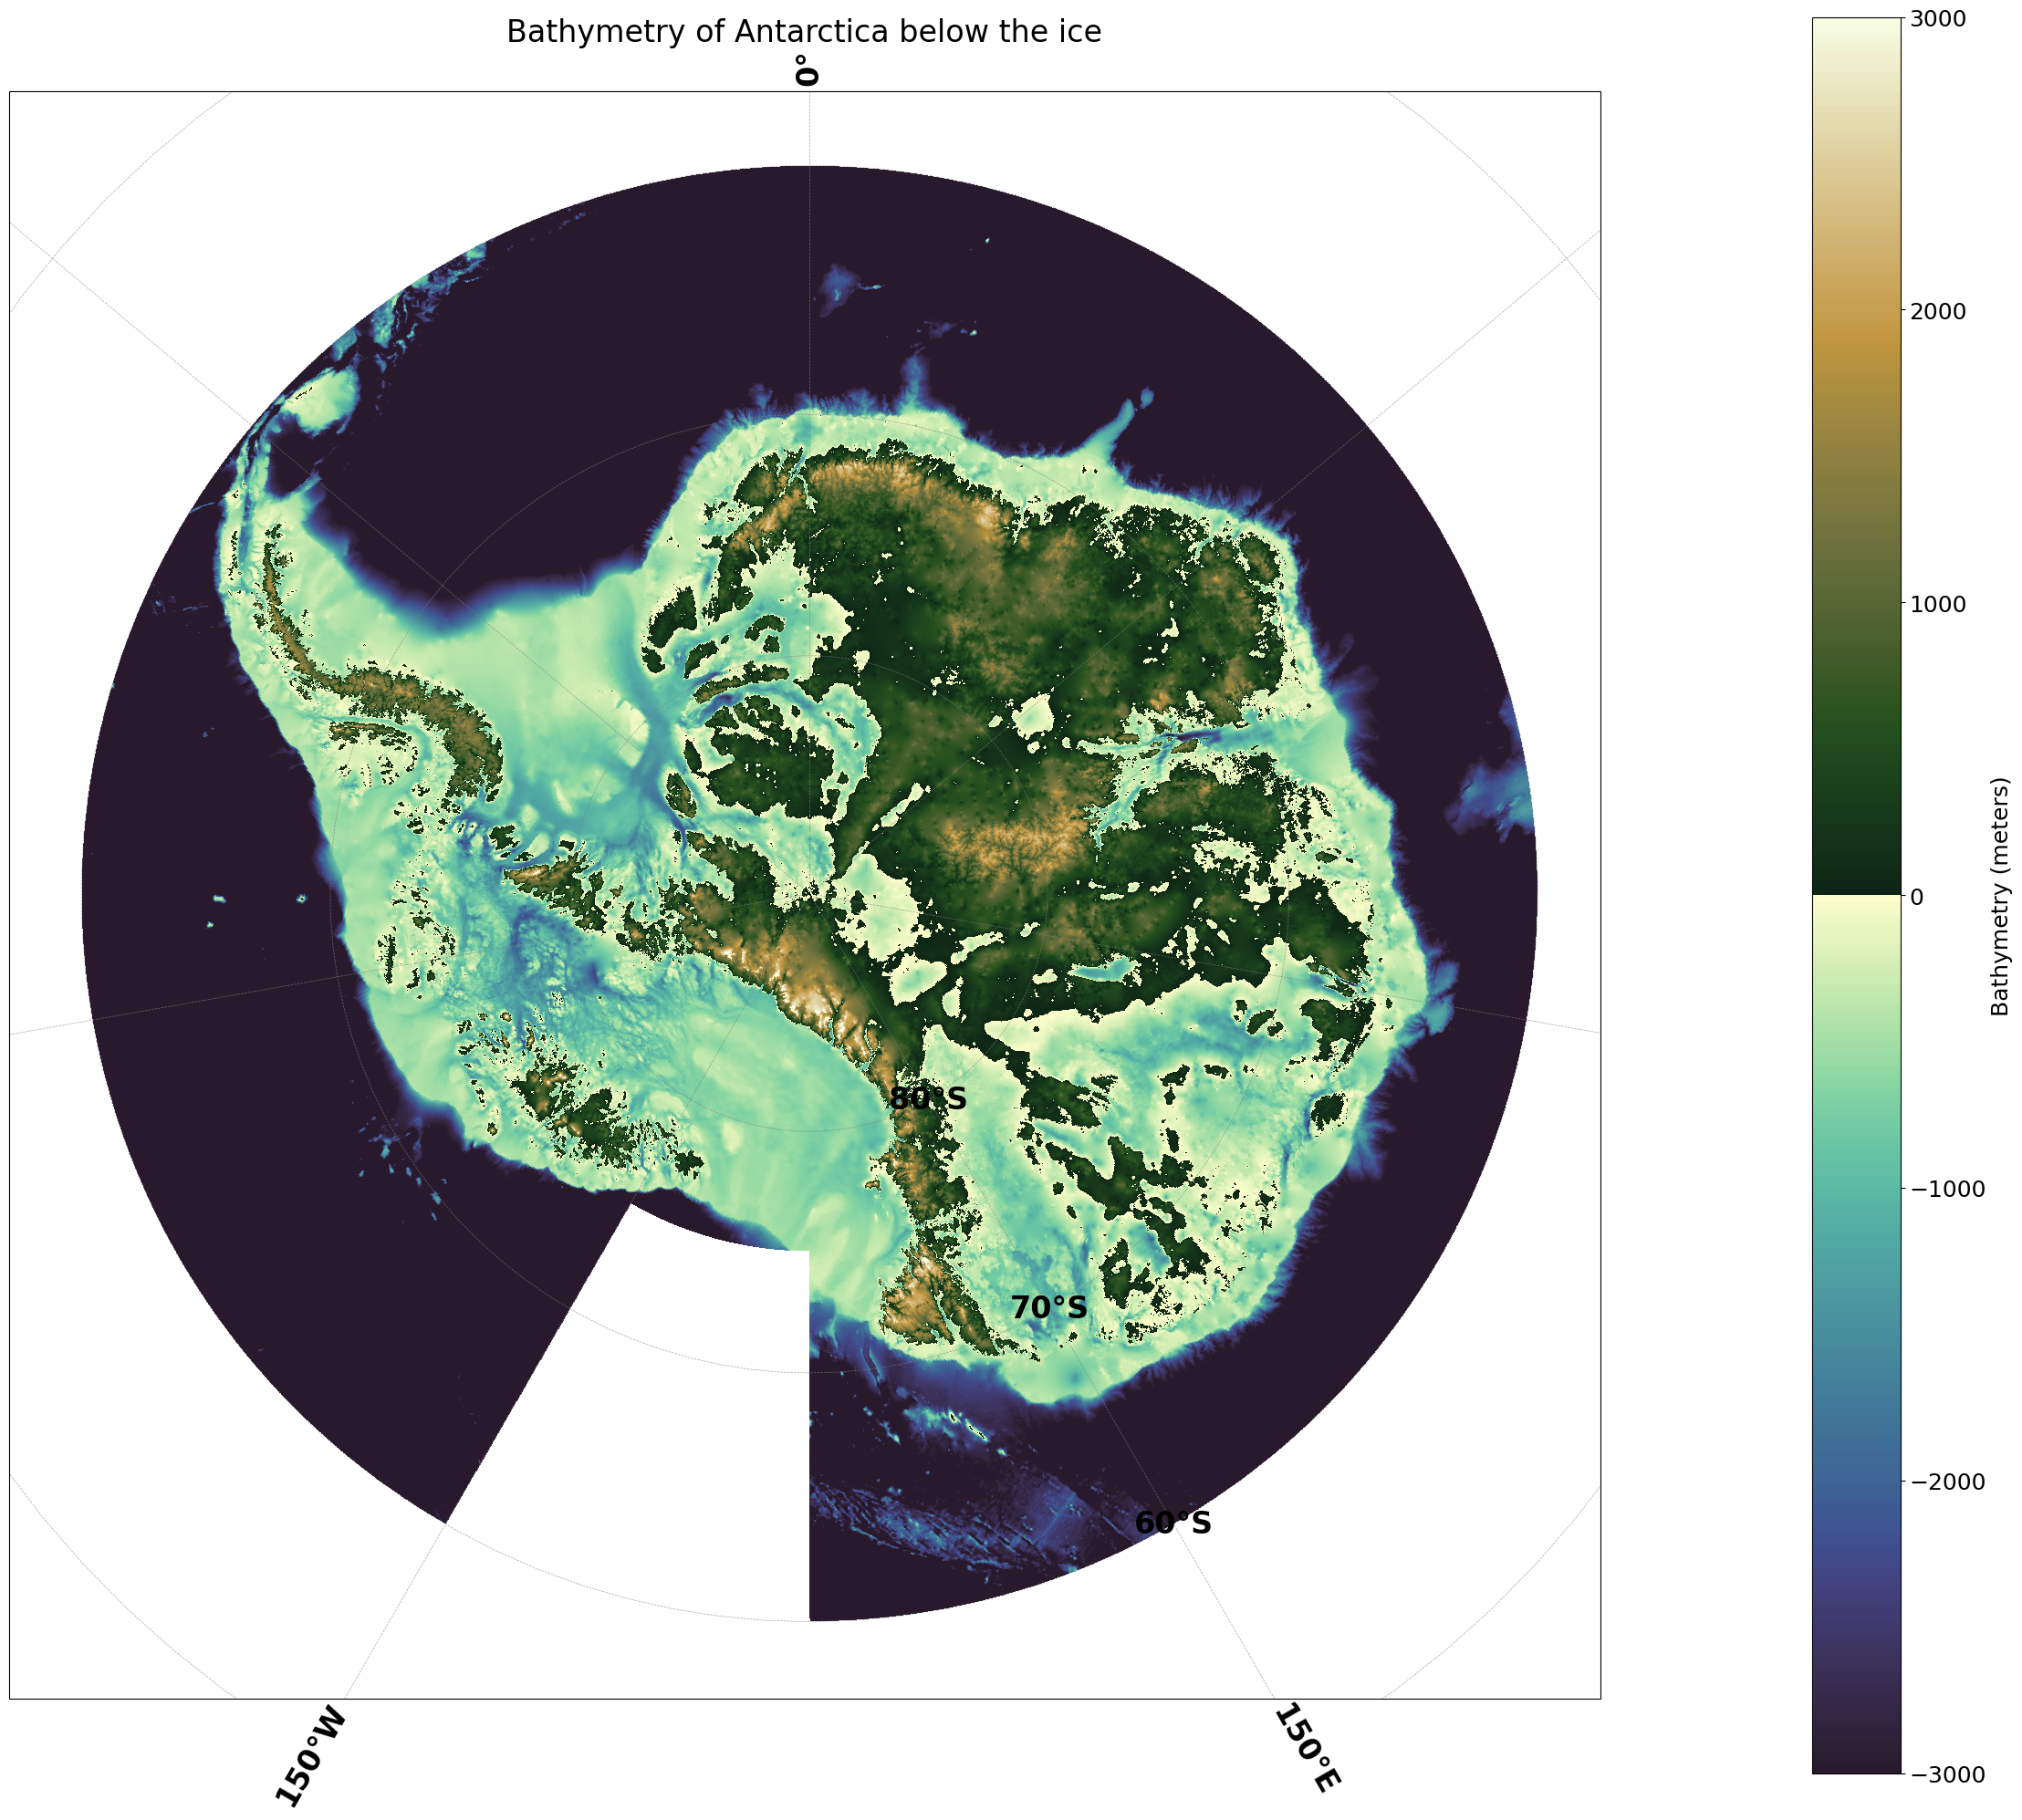

In [21]:
#!/usr/bin/env python3
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs
from siphon.catalog import TDSCatalog
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import ticker as mticker

# Setting up the figure and related variables

# Set up the map projection (you can choose a different projection if needed)
projection = ccrs.SouthPolarStereo()
transform = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(30, 25))

# Geospatial range to plot
# Full range
lat_min = -90
lat_max = -57
lon_min = -180
lon_max = 180
# Zoom
# lat_min = -80
# lat_max = -70
# lon_min = 0
# lon_max = 60

# Elevation range for colour scale
vmax = 3000
vmin = vmax * -1
# Contour interval
contour_interval = 500
contour_levels = np.arange(vmin, vmax + contour_interval, contour_interval)
# Plot only every nth sample in both lat and lon to speed up processing
sampling_factor = 10

# Traversing the THREDDS server
catalog_url = 'https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/15s/15s_bed_elev_netcdf/catalog.xml'

# Access the THREDDS catalog
catalog = TDSCatalog(catalog_url)

# Traverse through the catalog and print a list of the NetCDF files
datasets_filenames = catalog.datasets

# Traverse through the catalog and print URLs of the NetCDF files
datasets_urls = []
for dataset in catalog.datasets.values():
    datasets_urls.append(dataset.access_urls['OPENDAP'])

n=0
for dataset in catalog.datasets.values():
    if 'ETOPO_2022_v1_15s_S' in dataset.name:
        n=n+1
        print(f"Processing dataset {n}: {dataset.name}")
        ds = xr.open_dataset(dataset.access_urls['OPENDAP'])
        bathymetry = ds['z']

        # Select every nth sample for faster resampling
        bathymetry_resampled = bathymetry.isel(
            lat=slice(None, None, sampling_factor),
            lon=slice(None, None, sampling_factor)
        )

        # Selecting data only within geospatial limits specified
        bathymetry_resampled = bathymetry_resampled.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        if bathymetry_resampled.size == 0:
            print("No data in the specified range for this file.")
            continue  # Skip this file and move to the next one

        # Plot tile
        im =  bathymetry_resampled.plot(cmap=cmocean.cm.topo, vmin=vmin, vmax=vmax, ax=ax, transform=transform, add_colorbar=False)
        # Plot contours
        bathymetry_resampled.plot.contour(levels=contour_levels, colors='black', linewidths=0.1)

# Add labels, title, colorbar, etc. as needed
ax.set_title('Bathymetry of Antarctica below the ice', fontsize=24)

# Configure gridlines
gl = ax.gridlines(
    crs=transform, draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.7, linestyle='--'
)
gl.ylocator = mticker.AutoLocator()
gl.xlocator = mticker.AutoLocator()
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 24, 'color': 'black', 'weight':'bold'}
gl.ylabel_style = {'size': 24, 'color': 'black', 'weight':'bold'}

ax.set_extent([lon_min, lon_max, lat_min, lat_max], transform)

# Create a single colorbar for both plots
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Bathymetry (meters)', fontsize=18)
cbar.ax.tick_params(labelsize=18)

# Show the plot
plt.savefig('antarctica.png', dpi=500)

plt.show()

### Writing the data to a CSV file

You can write all or a subset of the data to a pandas dataframe that you can export as a CSV file.

In [22]:
url = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/15s/15s_bed_elev_netcdf/ETOPO_2022_v1_15s_N75W030_bed.nc'
ds = xr.open_dataset(url)
df = ds['z'].to_dataframe()
df.head()

z
lat       lon                    
60.002083 -29.997917 -1359.126709
          -29.993750 -1380.097778
          -29.989583 -1409.262817
          -29.985417 -1439.629639
          -29.981250 -1464.465820

In [23]:
csv_name = 'ETOPO_2022_v1_15s_N75W030_bed.csv'
df.to_csv(csv_name)